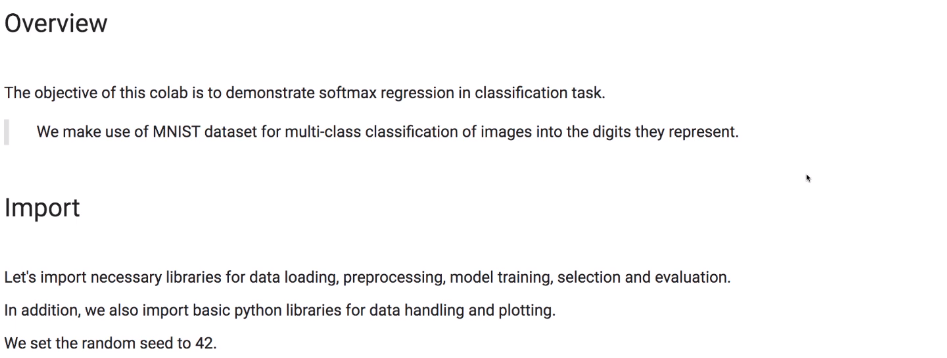

In [1]:
import numpy as np
from pprint import pprint

np.random.seed(42)

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# global settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(8,6))

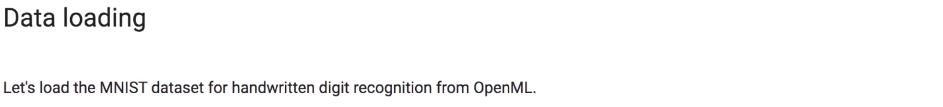

In [7]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

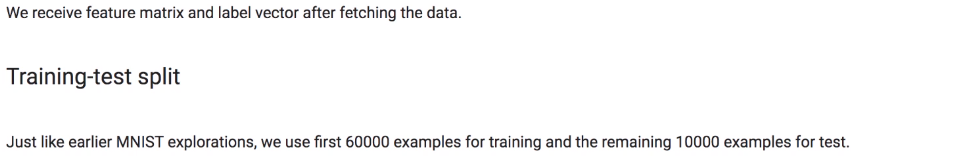

In [8]:
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

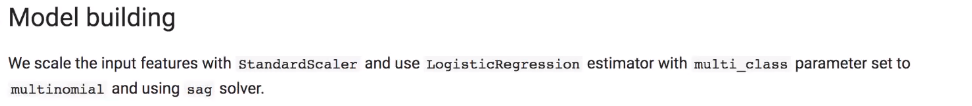

In [15]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='sag')),
])
pipe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [16]:
pipe[-1].coef_.shape

(10, 784)

In [17]:
pipe[-1].intercept_.shape

(10,)

In [18]:
pipe[-1].classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)


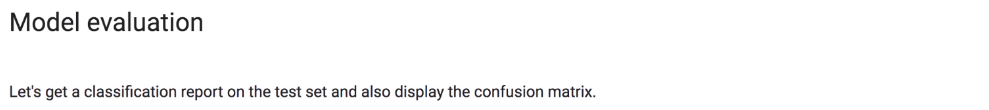

In [19]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



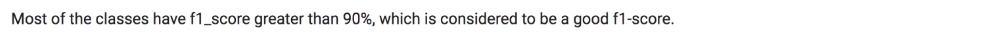

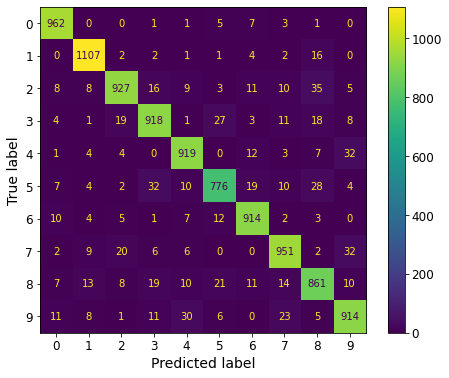

In [20]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)
plt.show()

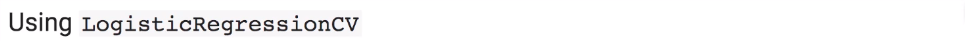

In [9]:
scorer = make_scorer(f1_score, average='micro')
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegressionCV(
            cv=5, multi_class='multinomial', solver='sag',
            scoring=scorer, max_iter=100, random_state=1729
        )
    ),
])
pipe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegressionCV(cv=5, multi_class='multinomial',
                                      random_state=1729,
                                      scoring=make_scorer(f1_score, average=micro),
                                      solver='sag'))])

In [10]:
pipe[-1].C_

array([2.7825594, 2.7825594, 2.7825594, 2.7825594, 2.7825594, 2.7825594,
       2.7825594, 2.7825594, 2.7825594, 2.7825594])

In [11]:
pipe[-1].l1_ratio_

array([None, None, None, None, None, None, None, None, None, None],
      dtype=object)

In [12]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.92      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



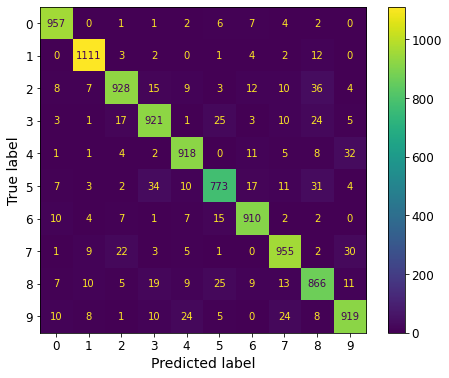

In [14]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)
plt.show()